In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

In [2]:
df_sap_bloom = pd.read_csv('SAP BLOOM 09032020.csv', sep=';', header=0)

df_sap_bloom['date'] = df_sap_bloom['date'].str[11:]
day_to_string = datetime(2020, 3, 9).strftime('%Y-%m-%d')
df_sap_bloom['date'] = day_to_string + " " + df_sap_bloom['date']
df_sap_bloom['date'] = pd.to_datetime(df_sap_bloom['date'])
df_sap_bloom = df_sap_bloom.set_index(pd.DatetimeIndex(df_sap_bloom['date']))
df_sap_bloom = df_sap_bloom.drop(columns='date')
df_sap_bloom['hl'] = df_sap_bloom.high - df_sap_bloom.low

df_sap_bloom

,open,high,low,close,hl
date,,,,,
2020-03-09 11:02:00,100.00,100.00,99.02,99.21,0.98
2020-03-09 11:03:00,99.38,99.75,99.19,99.62,0.56
2020-03-09 11:04:00,99.64,99.75,99.31,99.46,0.44
2020-03-09 11:05:00,99.43,99.50,97.94,97.99,1.56
2020-03-09 11:06:00,97.91,98.26,97.74,98.26,0.52
...,...,...,...,...,...
2020-03-09 19:26:00,99.93,99.99,99.77,99.85,0.22
2020-03-09 19:27:00,99.89,99.99,99.83,99.85,0.16
2020-03-09 19:28:00,99.85,99.96,99.73,99.84,0.23


In [3]:
df_2 = pd.read_csv('SAP CHIX 09032020.csv', sep=',', header=0)
df_2['Time'] = df_2['Time'].astype(str)
df_2['Time'] = df_2['Time'].str[:15]
df_2['Time'] = pd.to_datetime(df_2['Time'])
df_2 = df_2.drop([0])
df_2['Time'] = df_2['Time'] + timedelta(hours=3)
df_2 = df_2.set_index('Time')
df_2 = df_2.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_2

,Price
Time,
2020-03-09 12:00:09,99.915
2020-03-09 12:00:10,99.880
2020-03-09 12:00:19,99.920
2020-03-09 12:00:19,99.930
2020-03-09 12:00:19,99.940
...,...
2020-03-09 12:59:51,101.150
2020-03-09 12:59:51,101.140
2020-03-09 12:59:51,101.140


In [4]:
df_3 = pd.read_csv('SAP CHIX 09032020 1.csv', sep=',', header=0)
df_3['Time'] = df_3['Time'].astype(str)
df_3['Time'] = df_3['Time'].str[:15]
df_3['Time'] = pd.to_datetime(df_3['Time'])
df_3 = df_3.drop([0])
df_3['Time'] = df_3['Time'] + timedelta(hours=3)
df_3 = df_3.set_index('Time')
df_3 = df_3.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_3

,Price
Time,
2020-03-09 11:02:49,99.62
2020-03-09 11:02:49,99.06
2020-03-09 11:02:49,99.06
2020-03-09 11:02:51,99.08
2020-03-09 11:02:51,99.16
...,...
2020-03-09 11:59:35,99.79
2020-03-09 11:59:35,99.76
2020-03-09 11:59:35,99.75


In [5]:
df_sap_chix = pd.concat([df_3, df_2])
df_sap_chix

,Price
Time,
2020-03-09 11:02:49,99.62
2020-03-09 11:02:49,99.06
2020-03-09 11:02:49,99.06
2020-03-09 11:02:51,99.08
2020-03-09 11:02:51,99.16
...,...
2020-03-09 12:59:51,101.15
2020-03-09 12:59:51,101.14
2020-03-09 12:59:51,101.14


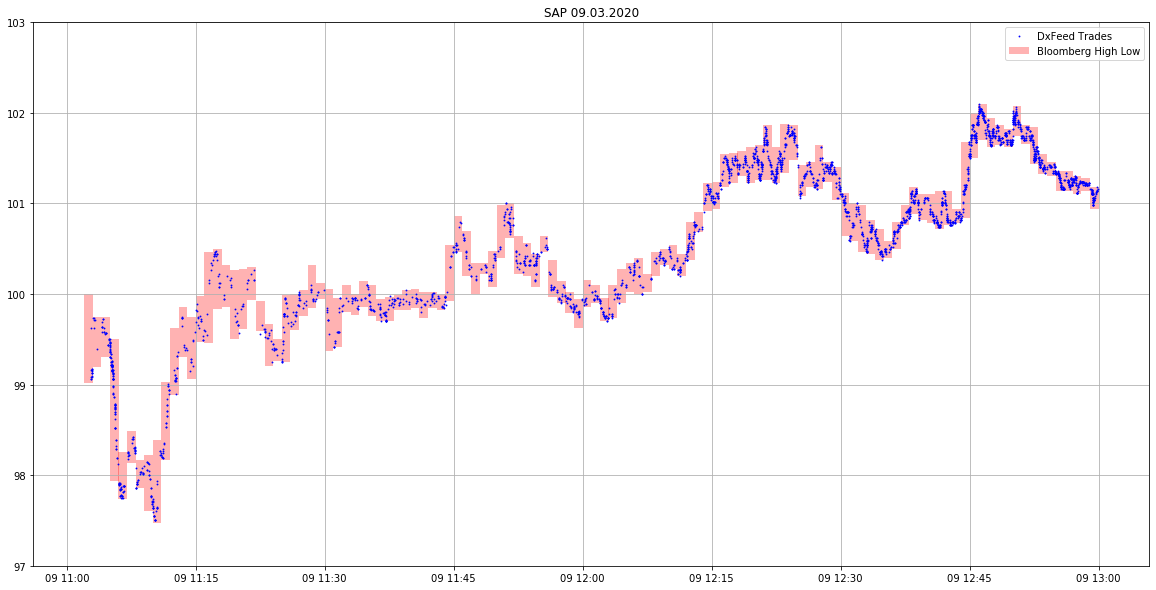

In [13]:
df_sap_bloom = df_sap_bloom.loc[:'2020-03-09 12:59:00']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_sap_chix, 'bp', ms=1, label='DxFeed Trades')
ax.bar(df_sap_bloom.index, df_sap_bloom.hl, bottom=df_sap_bloom.low, alpha=0.3, width=0.0007,  \
       color='red', align='edge', label='Bloomberg High Low')
ax.grid()
plt.ylim(97, 103)
plt.title('SAP 09.03.2020')
plt.legend()
                  
plt.show()

In [7]:
df_sie_bloom = pd.read_csv('SIE BLOOM 09032020.csv', sep=';', header=0)

df_sie_bloom['date'] = df_sie_bloom['date'].str[11:]
df_sie_bloom['date'] = day_to_string + " " + df_sie_bloom['date']
df_sie_bloom['date'] = pd.to_datetime(df_sie_bloom['date'])
df_sie_bloom = df_sie_bloom.set_index(pd.DatetimeIndex(df_sie_bloom['date']))
df_sie_bloom = df_sie_bloom.drop(columns='date')
df_sie_bloom['hl'] = df_sie_bloom.high - df_sie_bloom.low
df_sie_bloom = df_sie_bloom.sort_index(axis=0)
df_sie_bloom

,open,high,low,close,hl
date,,,,,
2020-03-09 11:02:00,80.00,81.20,79.10,79.32,2.10
2020-03-09 11:03:00,79.31,80.51,79.27,80.51,1.24
2020-03-09 11:04:00,80.34,80.56,80.17,80.27,0.39
2020-03-09 11:05:00,80.25,80.38,79.49,79.51,0.89
2020-03-09 11:06:00,79.55,79.79,79.27,79.42,0.52
...,...,...,...,...,...
2020-03-09 19:26:00,80.95,81.00,80.79,80.86,0.21
2020-03-09 19:27:00,80.88,80.92,80.81,80.83,0.11
2020-03-09 19:28:00,80.81,80.95,80.75,80.93,0.20


In [8]:
df_sie_chix_1 = pd.read_csv('SIE CHIX 09032020.csv', sep=',', header=0)
df_sie_chix_1['Time'] = df_sie_chix_1['Time'].astype(str)
df_sie_chix_1['Time'] = df_sie_chix_1['Time'].str[:15]
df_sie_chix_1['Time'] = pd.to_datetime(df_sie_chix_1['Time'])
df_sie_chix_1 = df_sie_chix_1.drop([0])
df_sie_chix_1['Time'] = df_sie_chix_1['Time'] + timedelta(hours=3)
df_sie_chix_1 = df_sie_chix_1.set_index('Time')
df_sie_chix_1 = df_sie_chix_1.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_sie_chix_1

,Price
Time,
2020-03-09 11:00:28,81.79
2020-03-09 11:00:28,83.10
2020-03-09 11:02:43,80.29
2020-03-09 11:02:43,80.30
2020-03-09 11:02:43,80.17
...,...
2020-03-09 11:59:37,80.88
2020-03-09 11:59:38,80.88
2020-03-09 11:59:38,80.88


In [9]:
df_sie_chix_2 = pd.read_csv('SIE CHIX 09032020 1.csv', sep=',', header=0)
df_sie_chix_2['Time'] = df_sie_chix_2['Time'].astype(str)
df_sie_chix_2['Time'] = df_sie_chix_2['Time'].str[:15]
df_sie_chix_2['Time'] = pd.to_datetime(df_sie_chix_2['Time'])
df_sie_chix_2 = df_sie_chix_2.drop([0])
df_sie_chix_2['Time'] = df_sie_chix_2['Time'] + timedelta(hours=3)
df_sie_chix_2 = df_sie_chix_2.set_index('Time')
df_sie_chix_2 = df_sie_chix_2.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_sie_chix_2

,Price
Time,
2020-03-09 12:00:04,81.00
2020-03-09 12:00:09,80.96
2020-03-09 12:00:09,80.96
2020-03-09 12:00:16,80.96
2020-03-09 12:00:25,80.97
...,...
2020-03-09 12:59:34,82.14
2020-03-09 12:59:50,82.20
2020-03-09 12:59:51,82.19


In [10]:
df_sie_chix = pd.concat([df_sie_chix_1, df_sie_chix_2])
df_sie_chix

,Price
Time,
2020-03-09 11:00:28,81.79
2020-03-09 11:00:28,83.10
2020-03-09 11:02:43,80.29
2020-03-09 11:02:43,80.30
2020-03-09 11:02:43,80.17
...,...
2020-03-09 12:59:34,82.14
2020-03-09 12:59:50,82.20
2020-03-09 12:59:51,82.19


In [11]:
df_sie_bloom.loc['2020-03-09 12:20:00':'2020-03-09 12:25:00']
df_sie_chix.loc['2020-03-09 12:21:00':'2020-03-09 12:24:00']

,Price
Time,
2020-03-09 12:21:03,83.11
2020-03-09 12:21:03,83.11
2020-03-09 12:21:03,83.11
2020-03-09 12:23:30,83.05
2020-03-09 12:23:30,83.05
...,...
2020-03-09 12:23:57,83.05
2020-03-09 12:23:58,83.03
2020-03-09 12:23:58,83.03


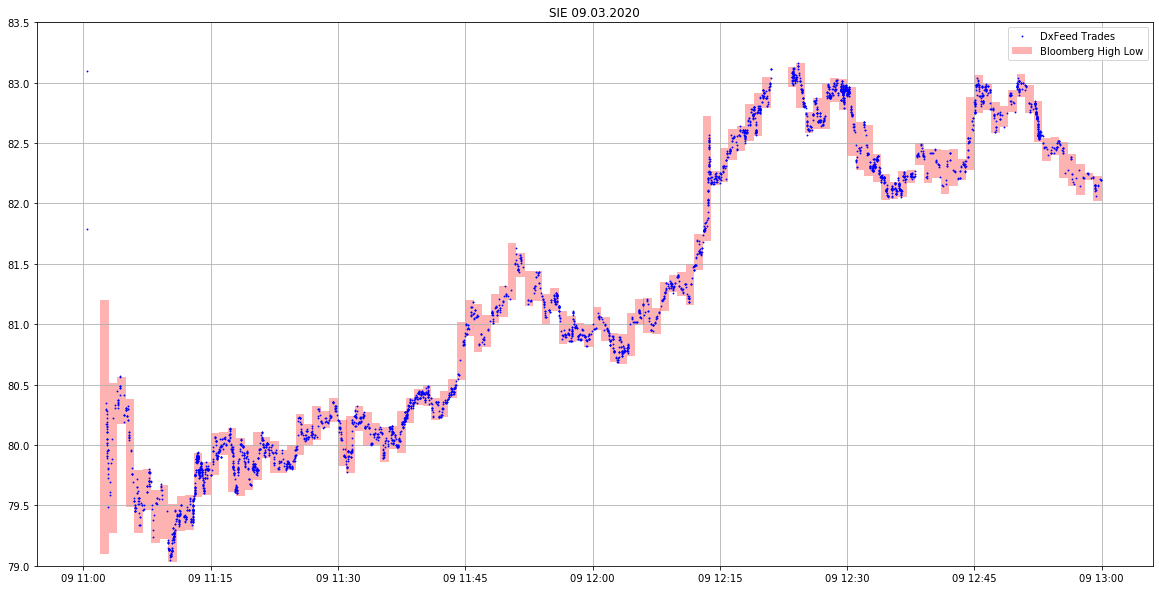

In [15]:
df_sie_bloom = df_sie_bloom.loc[:'2020-03-09 12:59:00']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_sie_chix, 'bp', ms=1, label='DxFeed Trades')
ax.bar(df_sie_bloom.index, df_sie_bloom.hl, bottom=df_sie_bloom.low, alpha=0.3, width=0.0007,  \
       color='red', align='edge', label='Bloomberg High Low')
ax.grid()
plt.ylim(79, 83.5)
plt.title('SIE 09.03.2020')
plt.legend()
                  
plt.show()